In [51]:
# import modules
import numpy as np
import astropy.units as u
import astropy.table as tbl
from CenterOfMass import CenterOfMass
from ReadFile import Read
from astropy.constants import G
import matplotlib
import matplotlib.pyplot as plt

In [104]:
class MassProfile:
# Class to define COM position and velocity properties of a given galaxy 
# and simulation snapshot
    
    
    def __init__(self, galaxy, Snap):
    # Initialize the instance of this Class with the following properties:
    
        # add a string of the filenumber to the value “000” ilbl = ‘000’ + str(Snap)
        ilbl = '000' + str(Snap)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        self.filename="%s_"%(galaxy) + ilbl + '.txt'
    
    
    
        # read data in the given file using Read
        self.time, self.total, self.data = Read(self.filename)                                                                                             

        #create an array to store indexes of particles of desired Ptype                                
        #self.index = np.where(self.data['type'] == ptype)

        # store the mass, positions, velocities of only the particles of the given type
        # the following only gives the example of storing the mass
        self.m = self.data['m']
        # write your own code to complete this for positions and velocities
        
    
        # spatial components      
        self.x = self.data['x']*u.kpc
        self.y = self.data['y']*u.kpc
        self.z = self.data['z']*u.kpc
        
        
        self.gname = galaxy
        
        
    def MassEnclosed(self, ptype, r) :
        # Inputs are particle types and array of Radii in Kpc
        # Returns mass array in Msun
        
        #Read particle type from previously
        index = np.where(self.data['type'] == ptype)
        
        # Object from COM
        COM = CenterOfMass(self.filename, ptype)
        
        COM_P = COM.COM_P(0.1)
        
        #Define the postion of the object 
        X = self.x[index] - COM_P[0]
        Y = self.y[index] - COM_P[1]
        Z = self.z[index] - COM_P[2]
        R = np.sqrt((X**2)+(Y**2)+(Z**2))
        
        # Defining mass
        M = self.m[index]
        TotM = np.zeros(np.size(r))
                    
        # Loop over mass
        for i in range(np.size(r)):
            index2 = np.where(R < r[i]*u.kpc)
            TotM[i] = np.sum(M[index2])
        
        return TotM * u.Msun * 1e10
        
        
    def MassEnclosedTotal(self, r) :
        
        if self.gname == 'M33' : 
            Totmass33 = self.MassEnclosed(1,r) + self.MassEnclosed(2,r)
            return Totmass33
        else :
            Totmass = self.MassEnclosed(1,r) + self.MassEnclosed(2,r) + self.MassEnclosed(3,r)
            return Totmass
    
    def HernquistMass(self, r, a, Mhalo):
        #Density =(M*a/2*pi*r)(1/(r+a)**3)
        Mhalo = self.MassEnclosedTotal(r)
        MassR = Mhalo*r**2 / (a+r)**2 #Mass at a certain radius
        
        return MassR
    
    
    def circ_vel(self, ptype, r):
        #compute the circular velocity
        
        MassEnc = self.MassEnclosed(ptype, r)
        Cv = np.sqrt(G*MassEnc/r)
                
        return Cv
    
    def circ_vel_tot(self, r):
        #Compute the total Circular velocity
        
        TotMassEnc = self.MassEnclosedTotal(r)
        
        TotCv = np.sqrt(G*TotMassEnc/r)
                
        return TotCv
        
    def HernquistVCirc(self, r, a, Mhalo):
    #compute the Hernquist circular velocity
        
        HernMass = HernquistMass(self, r, a, Mhalo)
        
        HCv = np.sqrt(G*HernMass/r)
                
        return HCv 

In [109]:
MW = MassProfile("MW", 0)
M31 = MassProfile("M31", 0)
M33 = MassProfile("M33", 0)

r = np.arange(0.25, 30.5, 1.5)

# Components of MW
MW_MassEncH = MW.MassEnclosed(1, r)
MW_MassEncD = MW.MassEnclosed(2, r)
MW_MassEncB = MW.MassEnclosed(3, r)

# Components of M31
M31_MassEncH = M31.MassEnclosed(1, r)
M31_MassEncD = M31.MassEnclosed(2, r)
M31_MassEncB = M31.MassEnclosed(3, r)

#Components of M33
M33_MassEncH = M33.MassEnclosed(1, r)
M33_MassEncD = M33.MassEnclosed(2, r)
#M33_MassEncB = M33.MassEnclosed(3, r)

MW_TotMassEnc = MW.MassEnclosedTotal(r)
M31_TotMassEnc = M31.MassEnclosedTotal(r)
M33_TotMassEnc = M33.MassEnclosedTotal(r)

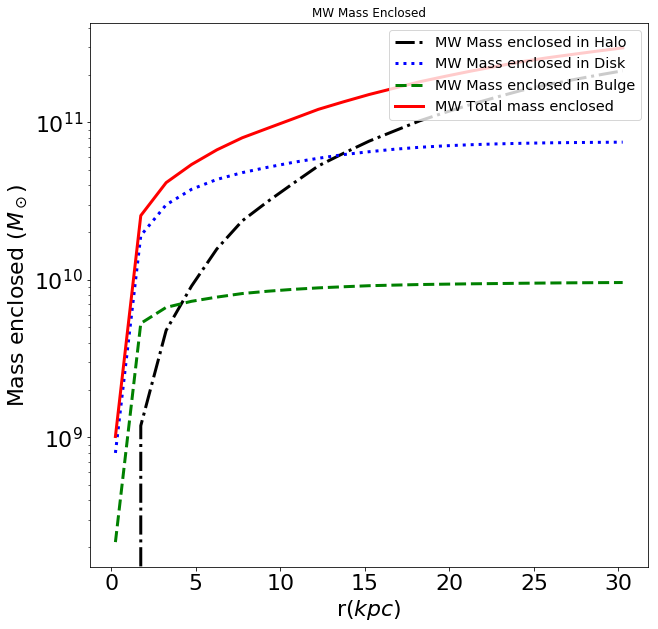

In [110]:
#Plot of the Mass Enclosed for MW

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#Plot the mass enclosed for MW
plt.title('MW Mass Enclosed')
ax.semilogy(r,MW_MassEncH,color='black', linewidth=3, linestyle='-.', label='MW Mass enclosed in Halo')
ax.semilogy(r,MW_MassEncD,color='blue', linewidth=3, linestyle=':', label='MW Mass enclosed in Disk')
ax.semilogy(r,MW_MassEncB,color='green', linewidth=3, linestyle='--',  label='MW Mass enclosed in Bulge')
ax.semilogy(r,MW_TotMassEnc,color='red', linewidth=3, label='MW Total mass enclosed')

# Add labels
plt.xlabel(r'r($kpc$)', fontsize=22)
plt.ylabel(r'Mass enclosed ($M_\odot$)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

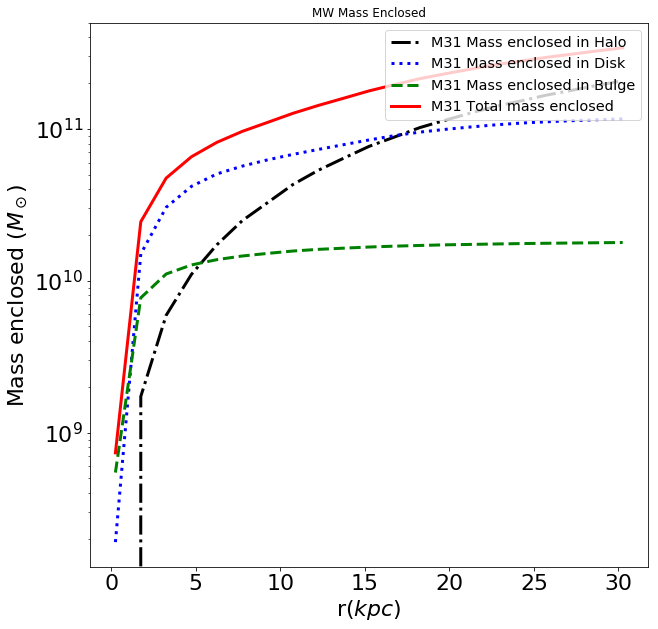

In [111]:
#Plot of the Mass Enclosed for M31

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#Plot the mass enclosed for M31
plt.title('MW Mass Enclosed')
ax.semilogy(r,M31_MassEncH,color='black', linewidth=3, linestyle='-.', label='M31 Mass enclosed in Halo')
ax.semilogy(r,M31_MassEncD,color='blue', linewidth=3, linestyle=':', label='M31 Mass enclosed in Disk')
ax.semilogy(r,M31_MassEncB,color='green', linewidth=3, linestyle='--',  label='M31 Mass enclosed in Bulge')
ax.semilogy(r,M31_TotMassEnc,color='red', linewidth=3, label='M31 Total mass enclosed')

# Add labels
plt.xlabel(r'r($kpc$)', fontsize=22)
plt.ylabel(r'Mass enclosed ($M_\odot$)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

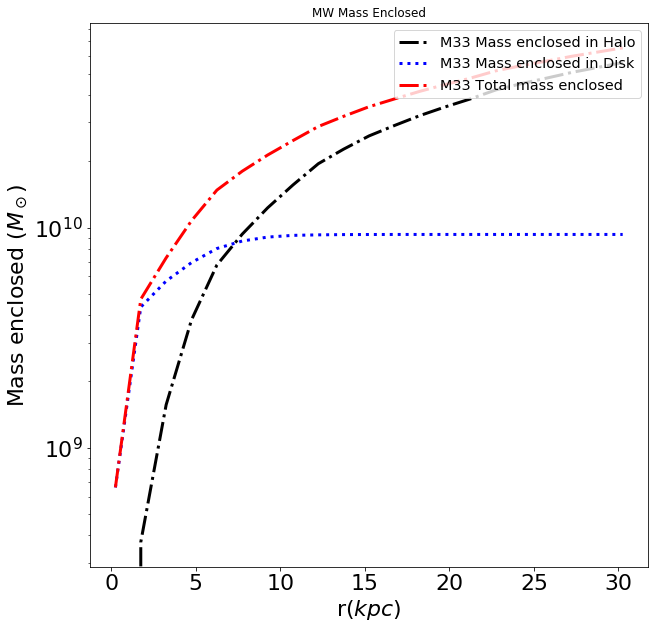

In [113]:
#Plot of the Mass Enclosed for M33

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#Plot the mass enclosed for M33
plt.title('MW Mass Enclosed')
ax.semilogy(r,M33_MassEncH,color='black', linewidth=3, linestyle='-.', label='M33 Mass enclosed in Halo')
ax.semilogy(r,M33_MassEncD,color='blue', linewidth=3, linestyle=':', label='M33 Mass enclosed in Disk')
#ax.semilogy(r,M33_MassEncB,color='brown', linewidth=3, linestyle='--',  label='M33 Mass enclosed in Bulge')
ax.semilogy(r,M33_TotMassEnc,color='red', linewidth=3, linestyle='-.',  label='M33 Total mass enclosed')

# Add labels
plt.xlabel(r'r($kpc$)', fontsize=22)
plt.ylabel(r'Mass enclosed ($M_\odot$)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

In [ ]:
#Defining the roation curve

In [ ]:
# Circ Vel MW by components

MW_CVH = MW.circ_vel(1, r)
MW_CVD = MW.circ_vel(2, r)
MW_CVB = MW.circ_vel(3, r)


# Circ Vel M31 by components
M31_CVH = M31.circ_vel(1, r)
M31_CVD = M31.circ_vel(2, r)
M31_CVB = M31.circ_vel(3, r)


# Circ Vel MW by components
M33_CVH = M33.circ_vel(1, r)
M33_CVD = M33.circ_vel(2, r)
#M33_CVB = M33.circ_vel(3, r)

In [ ]:
#Total Rotation

In [117]:
MW_TotCV = MW.circ_vel_tot(r)
M31_TotCV  = M31.circ_vel_tot(r)
M33_TotCV  = M33.circ_vel_tot(r)


In [ ]:
#Now we plot the rotation curve of each galaxy

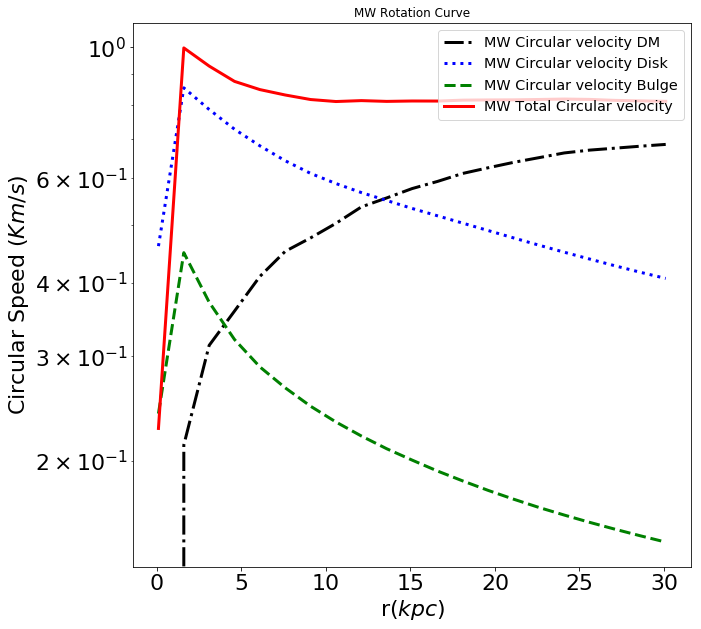

In [118]:
# Plot of rotation curve of MW
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

r =np.arange(0.1, 30.5, 1.5)

#MW mass enclosed
plt.title('MW Rotation Curve')
ax.semilogy(r,MW_CVH,color='black', linewidth=3, linestyle='-.', label='MW Circular velocity DM')
ax.semilogy(r,MW_CVD,color='blue', linewidth=3, linestyle=':', label='MW Circular velocity Disk')
ax.semilogy(r,MW_CVB,color='green', linewidth=3, linestyle='--',  label='MW Circular velocity Bulge')
ax.semilogy(r,MW_TotCV,color='red', linewidth=3, label='MW Total Circular velocity')

# Add labels
plt.xlabel(r'r($kpc$)', fontsize=22)
plt.ylabel(r'Circular Speed ($Km/s$)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

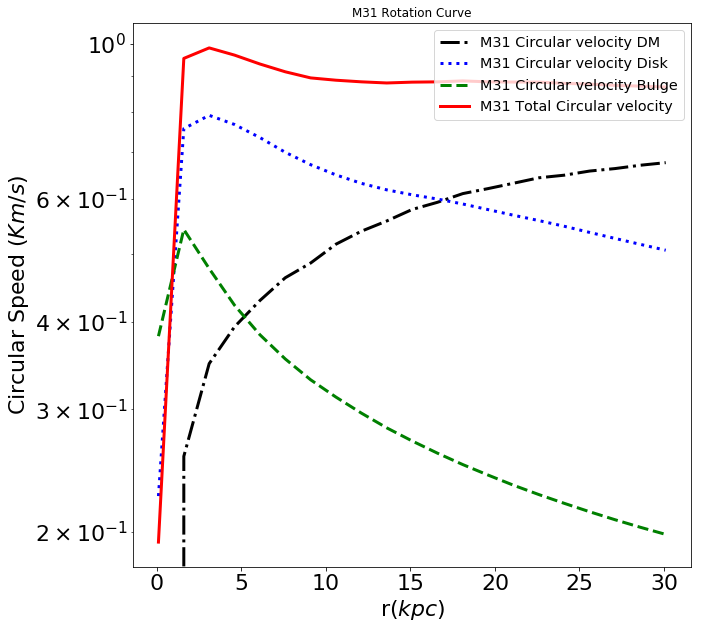

In [119]:
# Plot of rotation curve of M31

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

r =np.arange(0.1, 30.5, 1.5)

#MW rotation curve
plt.title('M31 Rotation Curve')
ax.semilogy(r,M31_CVH,color='black', linewidth=3, linestyle='-.', label='M31 Circular velocity DM')
ax.semilogy(r,M31_CVD,color='blue', linewidth=3, linestyle=':', label='M31 Circular velocity Disk')
ax.semilogy(r,M31_CVB,color='green', linewidth=3, linestyle='--',  label='M31 Circular velocity Bulge')
ax.semilogy(r,M31_TotCV,color='red', linewidth=3,  label='M31 Total Circular velocity')

# Add labels
plt.xlabel(r'r($kpc$)', fontsize=22)
plt.ylabel(r'Circular Speed ($Km/s$)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

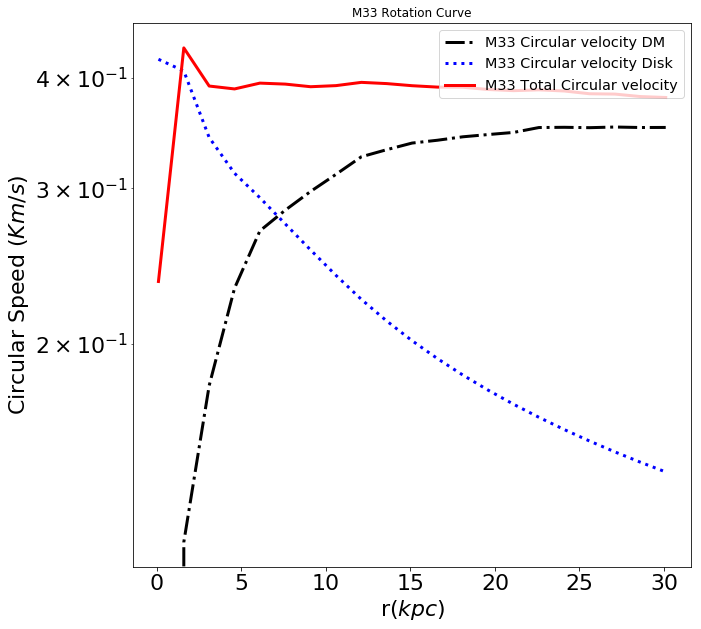

In [121]:
# Plot of rotation curve of M33

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

r =np.arange(0.1, 30.5, 1.5)

#MW rotation curve
plt.title('M33 Rotation Curve')
ax.semilogy(r,M33_CVH,color='black', linewidth=3, linestyle='-.', label='M33 Circular velocity DM')
ax.semilogy(r,M33_CVD,color='blue', linewidth=3, linestyle=':', label='M33 Circular velocity Disk')
#ax.semilogy(r,M33_CVB,color='green', linewidth=3, linestyle='--',  label='M33 Circular velocity Bulge')
ax.semilogy(r,M33_TotCV,color='red', linewidth=3,  label='M33 Total Circular velocity')

# Add labels
plt.xlabel(r'r($kpc$)', fontsize=22)
plt.ylabel(r'Circular Speed ($Km/s$)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')